# Exploratory Data Analysis - Google Play Store
## Overview
1. Understanding Data
2. Data Cleaning
3. Exploratory Data Analysis

In [55]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
url = ''
app = pd.read_csv("./app.csv")

In [3]:
# First 5 rows of app
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# See all the variables in app
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# Understand object types of each variable in app
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Data Cleaning**

We observe that these variables should be numeric: Size, Installs, Price

In [6]:
# Change Review column to numeric
app['Reviews'] = app['Reviews'].apply(lambda x: float(x[:-1])*1000000
                                      if x[-1] == 'M' else float(x))

In [7]:
# Edits to Installs column to make it numeric
app['Installs'] = app['Installs'].apply(lambda x: x[:-1].replace(",", ""))

In [8]:
# Remove rows with values Fre and empty value for Installs
app.Installs.value_counts()
app = app[app.Installs != 'Fre' ]
app = app[app.Installs != '']

In [9]:
# Convert Installs to type int
app.Installs = app.Installs.astype('int')

In [10]:
# Convert Price to type float
app.Price = app.Price.apply(lambda x: x.replace("$", ""))
app.Price = app.Price.astype('float')

In [11]:
# Track changes
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
app.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.083900e+04,1.083900e+04,10839.000000
mean,4.191757,4.441939e+05,1.546577e+07,1.027463
std,0.515219,2.927893e+06,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,3.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Observe that some apps may have 2 genres, so I am going to split those into 2 new columns

In [13]:
# Understand the genre variable
app.Genres.value_counts()

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Travel & Local;Action & Adventure      1
Entertainment;Education                1
Comics;Creativity                      1
Trivia;Education                       1
Puzzle;Education                       1
Name: Genres, Length: 119, dtype: int64

In [14]:
# Separation of Genres column
app.loc[:,"Genre1"] = app.loc[:,'Genres'].apply(lambda x: x.split(";")[0])
app.loc[:,'Genre2'] = app.loc[:,'Genres'].apply(lambda x: x.split(";")[1] if len(x.split(";")) > 1 else "NA")
del app['Genres']

In [15]:
# Track changes
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,NA
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,NA
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,NA
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


**Exploratory Data Analysis**
Split exploration by Numerical and Categorical columns
1. Numerical: Rating, Reviews, Installs, Price
2. Categorical: Category, Type, Content Rating, Genre

In [16]:
num = ["Rating", "Reviews", "Installs", "Price"]
cat = ["Category", "Type", "Content Rating", "Genre1", "Genre2"]

Let's start with numeric variables

In [17]:
app_num = app[num]
app_num.head()

,Rating,Reviews,Installs,Price
0,4.1,159.0,10000,0.0
1,3.9,967.0,500000,0.0
2,4.7,87510.0,5000000,0.0
3,4.5,215644.0,50000000,0.0
4,4.3,967.0,100000,0.0


In [18]:
app.Price.value_counts()

0.00    10039
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

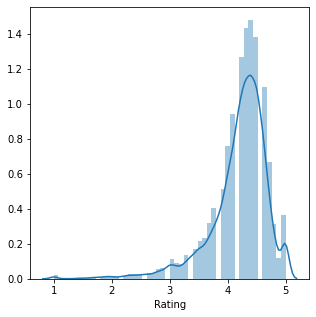

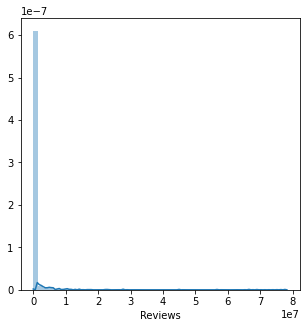

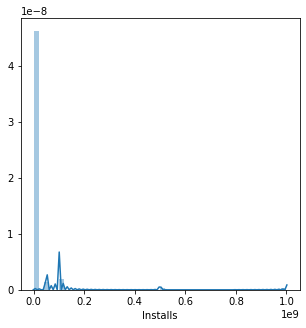

In [19]:
# Distribution of Ratings, Reviews and Installs
for var in app_num:
    if var != "Price":
        f,ax=plt.subplots(figsize=(5,5))
        sns.distplot(app_num[var])

In [20]:
for var in app_num:
    if var != "Price":
        print(var + " Skewness:" + str(app_num[var].skew()))
        print(var + " Kurtosis:" + str(app_num[var].kurtosis()))

Rating Skewness:-1.8496951283704521
Rating Kurtosis:5.7869240668056
Reviews Skewness:16.448836503696477
Reviews Kurtosis:341.0291702627245
Installs Skewness:9.571619379367249
Installs Kurtosis:100.27047019222145


Price Skewness:6.301100424739957
Price Kurtosis:38.97665447861391


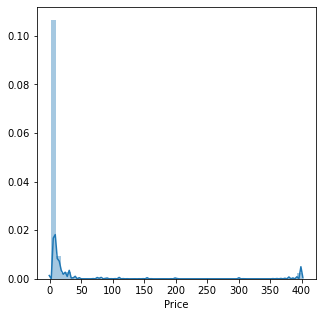

In [21]:
# Distributions of Prices of Paid Apps
app_num_paid = app_num[app_num.Price != 0]
app_num_paid.head()

f,ax=plt.subplots(figsize=(5,5))
sns.distplot(app_num_paid["Price"])
print("Price Skewness:" + str(app_num_paid["Price"].skew()))
print("Price Kurtosis:" + str(app_num_paid["Price"].kurtosis()))

In [22]:
# Distribution of Category, Type, Content Type
app_cat = app[cat]
app_cat.head()

,Category,Type,Content Rating,Genre1,Genre2
0,ART_AND_DESIGN,Free,Everyone,Art & Design,NA
1,ART_AND_DESIGN,Free,Everyone,Art & Design,Pretend Play
2,ART_AND_DESIGN,Free,Everyone,Art & Design,NA
3,ART_AND_DESIGN,Free,Teen,Art & Design,NA
4,ART_AND_DESIGN,Free,Everyone,Art & Design,Creativity


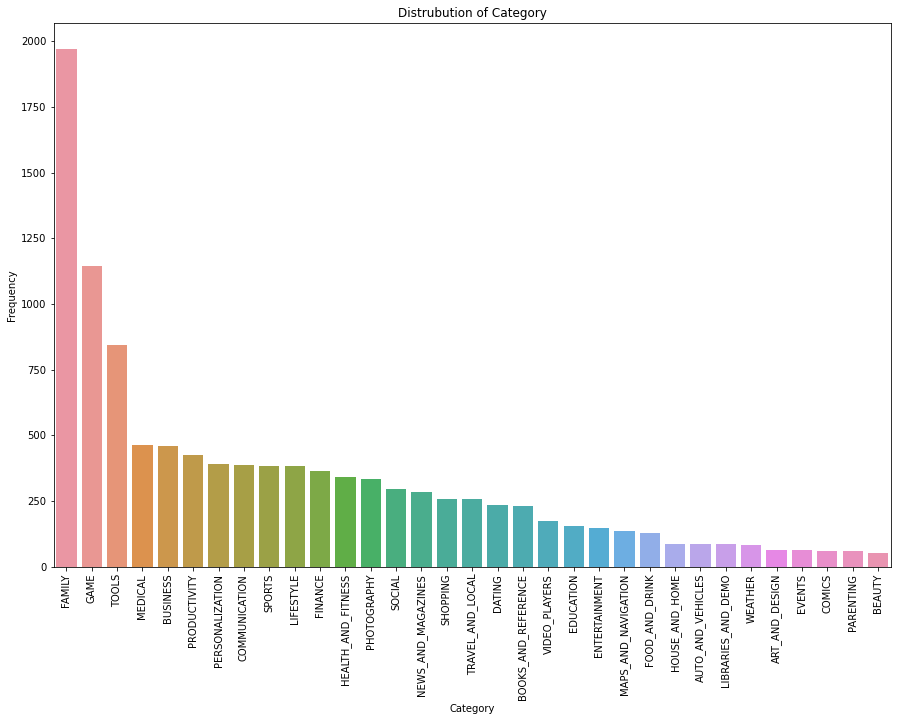

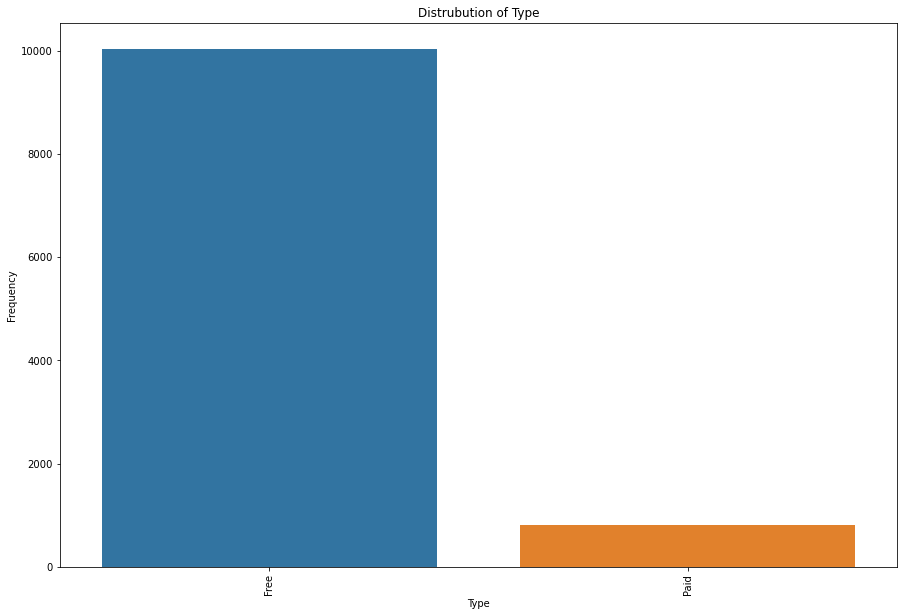

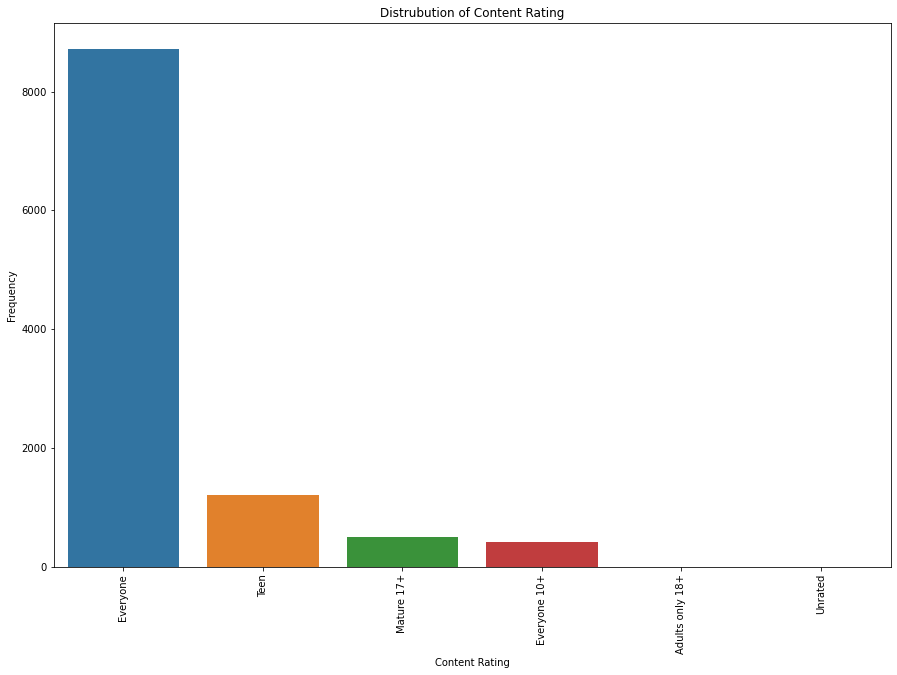

In [58]:
for var in app_cat:
    if var != "Genre1" and var != "Genre2":
        f,ax=plt.subplots(figsize=(15,10))
        sns.barplot(app_cat[var].value_counts().index,app_cat[var].value_counts()).set_title('Distrubution of ' + var)
        plt.xticks(rotation=90)
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()

In [51]:
Genre = pd.concat([app.Genre1, app.Genre2])

<bound method Series.dropna of 0        Art & Design
1        Art & Design
2        Art & Design
3        Art & Design
4        Art & Design
             ...     
10836              NA
10837              NA
10838              NA
10839              NA
10840              NA
Length: 21678, dtype: object>

In [53]:
Genre = Genre[Genre != "NA"]

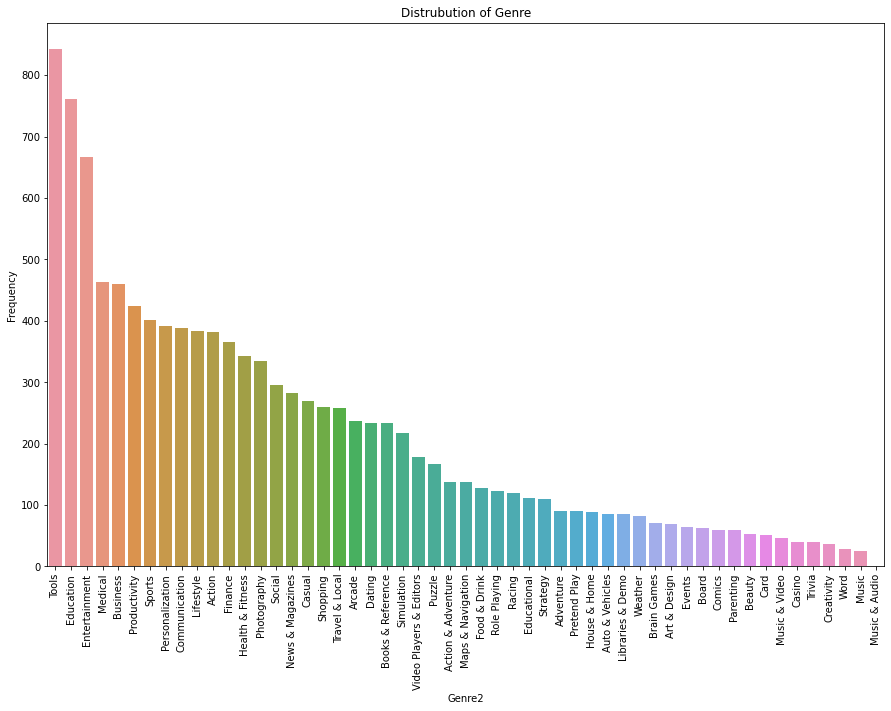

In [54]:
# Distribution of Genres
f,ax=plt.subplots(figsize=(15,10))
sns.barplot(Genre.value_counts().index,Genre.value_counts()).set_title('Distrubution of Genre')
plt.xticks(rotation=90)
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()

**Further Exploratory Data Analysis**

In [24]:
# Subset top 10 apps by installs
appInstalls = app.groupby('App')['Installs'].sum().reset_index()
appInstalls = appInstalls.sort_values(by = "Installs", ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

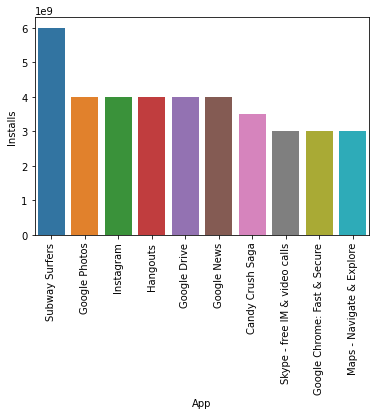

In [25]:
# Plotting of number of installations of top 10 apps
g =sns.barplot(x = appInstalls.App, y = appInstalls.Installs)
plt.xticks(rotation = 90)

In [ ]:
Analysis of Paid vs Free Apps

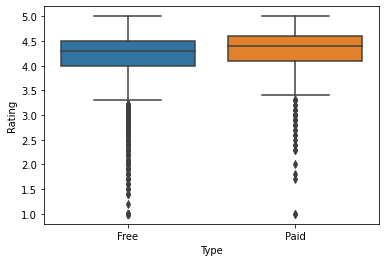

In [26]:
# Determine if paid or free apps are better rated
sns.boxplot(x = "Type", y = "Rating", data = app)

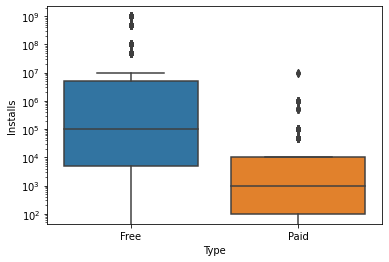

In [27]:
# Determine if paid or free apps are installed more
sns.boxplot(x = "Type", y = "Installs", data = app)
plt.yscale('log')

In [28]:
paid = app[app.Type == "Paid"]
free = app[app.Type == "Free"]

Text(0, 0.5, 'Frequency')

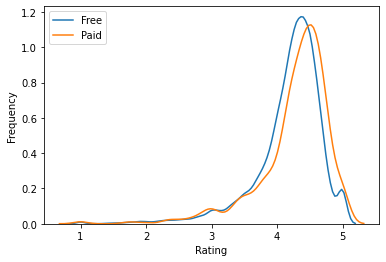

In [29]:
sns.kdeplot(free.Rating)
sns.kdeplot(paid.Rating)
plt.legend(['Free', 'Paid'])
plt.xlabel("Rating")
plt.ylabel("Frequency")

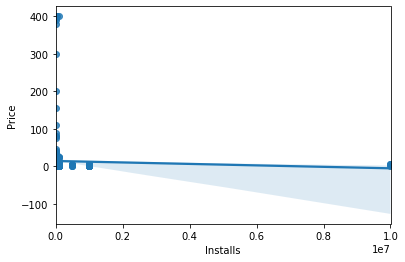

In [30]:
# Determine if there is relationship between price and installs
sns.regplot(x = "Installs", y = "Price", data = paid)

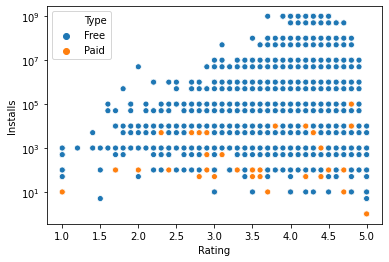

In [32]:
sns.scatterplot(x = app.Rating, y = app.Installs, data = app, hue = app.Type)
plt.yscale('log')

There is no observable relationship between an app's rating and its number of installations.

In [34]:
# Analysis of Top 5 Genre
list(app.Genre1.value_counts()[0:5].index.values)

['Tools', 'Entertainment', 'Education', 'Medical', 'Business']

In [35]:
subset = app[app.Genre1.isin(list(app.Genre1.value_counts()[0:5].index.values))]
subset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129.0,Varies with device,10000000,Free,0.0,Everyone,"July 30, 2018",Varies with device,Varies with device,Business,NA
188,Indeed Job Search,BUSINESS,4.3,674730.0,Varies with device,50000000,Free,0.0,Everyone,"May 21, 2018",Varies with device,Varies with device,Business,NA
189,Uber Driver,BUSINESS,4.4,1254730.0,Varies with device,10000000,Free,0.0,Everyone,"August 3, 2018",Varies with device,Varies with device,Business,NA
190,ADP Mobile Solutions,BUSINESS,4.3,85185.0,29M,5000000,Free,0.0,Everyone,"July 17, 2018",3.4.2,5.0 and up,Business,NA
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584.0,Varies with device,1000000,Free,0.0,Everyone,"May 4, 2018",Varies with device,Varies with device,Business,NA


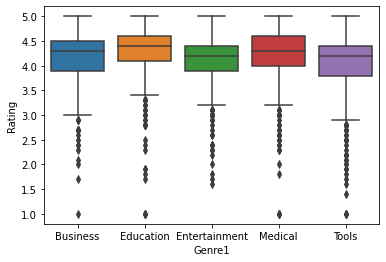

In [36]:
sns.boxplot(x = "Genre1", y = "Rating", data = subset)

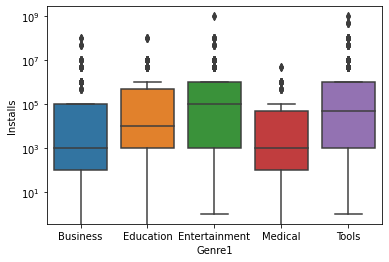

In [37]:
sns.boxplot(x = "Genre1", y = "Installs", data = subset)
plt.yscale('log')